In [1397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1398]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


# 1. Inspect Data

In [1399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

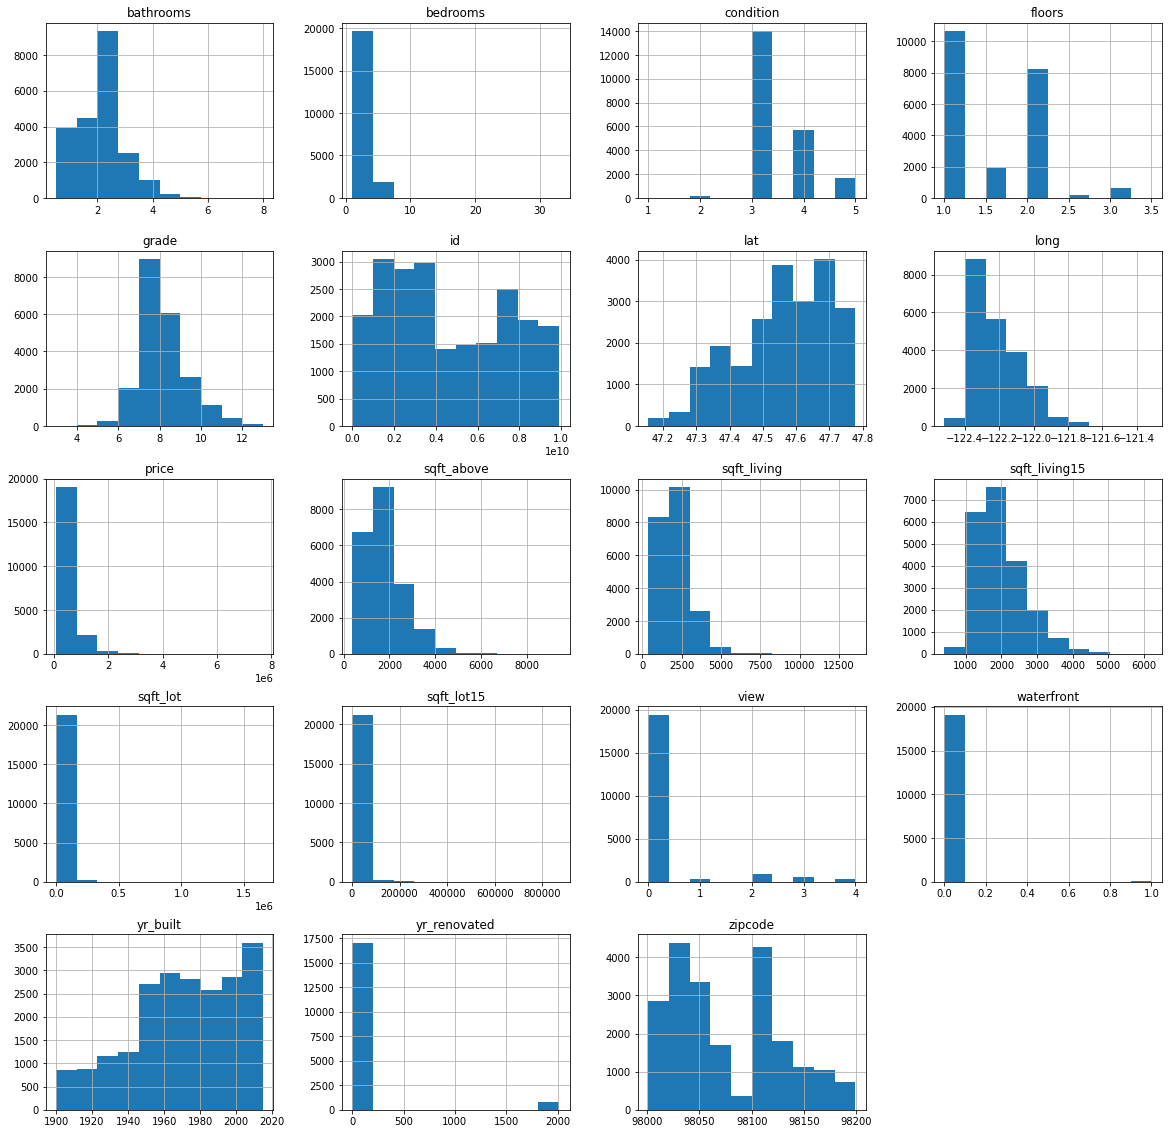

In [1400]:
data.hist(figsize=(20,20));

In [1401]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


# 2. Data Cleaning

## Missing Null Values

In [1402]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(data)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### Waterfront

Description: House which has a view to a waterfront

Data: Data includes binary numbers of 0 and 1

* There are 2376 rows with missing values (11% of total rows). I can either categorize the column as categorical data or keep it as an float.
* My assumption is that the null values means there is no waterfront. Since there are more houses with no waterfronts, I can change the null values to 0 which won't affect the data very much.
* I can delete the rows with null values but it will remove 11% of the overall data.

Result: Because I consider this an important feature, I decided to drop the rows with null values so it doesn't skew the data.

In [1403]:
pd.concat([data['waterfront'].value_counts(dropna=False),
           round((data['waterfront'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,waterfront,%
0.00000,19075,88.32000
nan,2376,11.00000
1.00000,146,0.68000


In [1404]:
# drops rows from dataset where waterfront has nan values
data = data[data['waterfront'].notna()]

In [1405]:
# waterfront column result
data['waterfront'] = data['waterfront'].fillna(0.0)
pd.concat([data['waterfront'].value_counts(dropna=False),
           round((data['waterfront'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,waterfront,%
0.00000,19075,99.24000
1.00000,146,0.76000


In [1406]:
data['waterfront'] = data['waterfront'].astype('int64').astype('category')
data['waterfront'].value_counts()

0    19075
1      146
Name: waterfront, dtype: int64

### View

Description: Has been viewed

Data: Integer values for the number of views

* There are 63 rows with missing values (0.29% of total rows).
* My assumption is that the null values means there were no views. Since the null values are small, I can change the null values to 0 views which won't affect the data very much.
* I can delete the rows with null values but it will remove 0.29% of the overall data which don't account for much of the total data anyway.

Result: I converted the null values to 0 and kept the data type as float.

In [1407]:
pd.concat([data['view'].value_counts(dropna=False),
           round((data['view'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,view,%
0.00000,17312,90.07000
2.00000,836,4.35000
3.00000,435,2.26000
1.00000,291,1.51000
4.00000,290,1.51000
nan,57,0.30000


In [1408]:
# converts nan values to 0
data['view'] = data['view'].fillna(0.0)               

In [1409]:
# view column results
pd.concat([data['view'].value_counts(dropna=False),
           round((data['view'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,view,%
0.00000,17369,90.36000
2.00000,836,4.35000
3.00000,435,2.26000
1.00000,291,1.51000
4.00000,290,1.51000


In [1410]:
data['view'] = data['view'].astype('int64').astype('category')
data['view'].value_counts()

0    17369
2      836
3      435
1      291
4      290
Name: view, dtype: int64

### Year Renovated

Description: Year when house was renovated

Data: Float values (example: 1991)

* There are 3842 rows with missing values (17.79% of total rows) and 17011 rows with values of 0.0 (78.77%).
* Both values don't make much sense here as both account for more than 90% of the data.

Result: I converted the null values to 0 and kept the data type as float.

In [1411]:
pd.concat([data['yr_renovated'].value_counts(dropna=False),
           round((data['yr_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,yr_renovated,%
0.00000,15157,78.86000
nan,3412,17.75000
2014.00000,64,0.33000
2013.00000,29,0.15000
2005.00000,27,0.14000
...,...,...
1953.00000,1,0.01000
1950.00000,1,0.01000
1954.00000,1,0.01000
1959.00000,1,0.01000


In [1412]:
# convert na values to 0
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)               

In [1413]:
# yr_renovated column results
pd.concat([data['yr_renovated'].value_counts(dropna=False),
           round((data['yr_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,yr_renovated,%
0.00000,18569,96.61000
2014.00000,64,0.33000
2013.00000,29,0.15000
2005.00000,27,0.14000
2000.00000,25,0.13000
...,...,...
1953.00000,1,0.01000
1950.00000,1,0.01000
1954.00000,1,0.01000
1959.00000,1,0.01000


In [1414]:
# results when all missing values have been resolved
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             19221 non-null  int64   
 1   date           19221 non-null  object  
 2   price          19221 non-null  float64 
 3   bedrooms       19221 non-null  int64   
 4   bathrooms      19221 non-null  float64 
 5   sqft_living    19221 non-null  int64   
 6   sqft_lot       19221 non-null  int64   
 7   floors         19221 non-null  float64 
 8   waterfront     19221 non-null  category
 9   view           19221 non-null  category
 10  condition      19221 non-null  int64   
 11  grade          19221 non-null  int64   
 12  sqft_above     19221 non-null  int64   
 13  sqft_basement  19221 non-null  object  
 14  yr_built       19221 non-null  int64   
 15  yr_renovated   19221 non-null  float64 
 16  zipcode        19221 non-null  int64   
 17  lat            19221 non-null  

## Remove Duplicates

Checking if there are duplicates among the data by checking the 'id' column to see if there are duplicate entries.

* Based on the below analysis, there are 177 duplicate entries. I looked into it further and noticed the prices are different. I assume the reason is that houses were sold more than once within the span of a year (May 2014 - May 2015).
* To deal with the duplicates, I will keep the row with the recent sold date and remove the rows with the oldest sold date.

In [1415]:
# print the number of duplicate entries
duplicates = data['id'].duplicated().sum()
print(f'There are {duplicates} duplicate entries.')

There are 134 duplicate entries.


In [1416]:
# check id column for any duplicates
data[data['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.00000,3,1.50000,1580,5000,1.00000,0,0,...,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,12/23/2014,700000.00000,3,1.50000,1580,5000,1.00000,0,0,...,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
313,4139480200,6/18/2014,1380000.00000,4,3.25000,4290,12103,1.00000,0,3,...,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
314,4139480200,12/9/2014,1400000.00000,4,3.25000,4290,12103,1.00000,0,3,...,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
345,3969300030,7/23/2014,165000.00000,4,1.00000,1000,7134,1.00000,0,0,...,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.00000,4,3.50000,2910,5260,2.00000,0,0,...,9,2910,0.0,2012,0.00000,98065,47.51680,-121.88300,2910,5260
20763,6300000226,6/26/2014,240000.00000,4,1.00000,1200,2171,1.50000,0,0,...,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
20764,6300000226,5/4/2015,380000.00000,4,1.00000,1200,2171,1.50000,0,0,...,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
21564,7853420110,10/3/2014,594866.00000,3,3.00000,2780,6000,2.00000,0,0,...,9,2780,0.0,2013,0.00000,98065,47.51840,-121.88600,2850,6000


In [1417]:
# removes the first row of each duplicate
data.drop_duplicates(subset='id',keep='last',inplace=True)

In [1418]:
# resets the index
data.reset_index(drop=True,inplace=True)

In [1419]:
# result after duplicates are removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             19087 non-null  int64   
 1   date           19087 non-null  object  
 2   price          19087 non-null  float64 
 3   bedrooms       19087 non-null  int64   
 4   bathrooms      19087 non-null  float64 
 5   sqft_living    19087 non-null  int64   
 6   sqft_lot       19087 non-null  int64   
 7   floors         19087 non-null  float64 
 8   waterfront     19087 non-null  category
 9   view           19087 non-null  category
 10  condition      19087 non-null  int64   
 11  grade          19087 non-null  int64   
 12  sqft_above     19087 non-null  int64   
 13  sqft_basement  19087 non-null  object  
 14  yr_built       19087 non-null  int64   
 15  yr_renovated   19087 non-null  float64 
 16  zipcode        19087 non-null  int64   
 17  lat            19087 non-null  

## Check Unusual Values

sqft_basement column had '?' as values. In order to fix, because the '?' values are only 2.17% of the column data, I decided to convert the '?' values to '0.0' values as it doesn't change the data too much.

In [1420]:
pd.concat([data['sqft_basement'].value_counts(dropna=False),
           round((data['sqft_basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,sqft_basement,%
0.0,11318,59.30000
?,415,2.17000
600.0,190,1.00000
700.0,186,0.97000
500.0,185,0.97000
...,...,...
2600.0,1,0.01000
176.0,1,0.01000
274.0,1,0.01000
2190.0,1,0.01000


In [1421]:
# replace '?' values with '0.0'
data['sqft_basement'].replace('?','0.0',inplace=True)

# convert column to all float values
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [1422]:
pd.concat([data['sqft_basement'].value_counts(dropna=False),
           round((data['sqft_basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,sqft_basement,%
0.00000,11733,61.47000
600.00000,190,1.00000
700.00000,186,0.97000
500.00000,185,0.97000
800.00000,171,0.90000
...,...,...
1852.00000,1,0.01000
374.00000,1,0.01000
518.00000,1,0.01000
266.00000,1,0.01000


## Data Correction

In [1423]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000
mean,4591952348.48441,542928.79337,3.37554,2.11919,2084.84110,15100.42086,1.49670,3.41091,7.66480,1793.49961,285.12082,1971.11322,67.97632,98077.66784,47.56002,-122.21383,1988.93912,12826.21161
std,2876363777.41376,372405.88241,0.92838,0.76941,923.04663,40923.83210,0.54043,0.64994,1.17497,832.46228,440.11975,29.40216,362.05223,53.41572,0.13873,0.14083,684.92432,27657.25086
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,1.00000,3.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2124084060.50000,324405.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,3.00000,7.00000,1200.00000,0.00000,1952.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3905060070.00000,452000.00000,3.00000,2.25000,1920.00000,7616.00000,1.50000,3.00000,7.00000,1570.00000,0.00000,1975.00000,0.00000,98065.00000,47.57210,-122.23000,1840.00000,7620.00000
75%,7334450770.00000,645000.00000,4.00000,2.50000,2550.00000,10720.00000,2.00000,4.00000,8.00000,2220.00000,540.00000,1997.00000,0.00000,98117.00000,47.67810,-122.12400,2361.50000,10094.50000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [1424]:
# hard to believe there's a 33 bedroom house, explored if there really is one
# https://www.realtytrac.com/property/wa/seattle/98103/8033-corliss-ave-n/185383585/
# apparently this is a typo, i will change to 3 bedrooms
data['bedrooms'].replace(33,3,inplace=True)

## Parse Date

In [1425]:
# parses the date into the quarter
data['quarter_sold'] = pd.to_datetime(data['date']).dt.quarter

quarter_sold_values = data['quarter_sold'].count()
quarter_sold_nunique = data['quarter_sold'].nunique()
quarter_sold_missing_values = data['quarter_sold'].isna().sum()

print(f'Number of values: {quarter_sold_values}')
print(f'Number of unique values: {quarter_sold_nunique}')
print(f'Missing values: {quarter_sold_missing_values}')

Number of values: 19087
Number of unique values: 4
Missing values: 0


In [1426]:
pd.concat([data['quarter_sold'].value_counts(dropna=False),
           round((data['quarter_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,quarter_sold,%
2,6023,31.56000
3,5229,27.40000
4,4213,22.07000
1,3622,18.98000


In [1427]:
# parses the date into the year
data['year_sold'] = pd.DatetimeIndex(data['date']).year

year_sold_values = data['year_sold'].count()
year_sold_nunique = data['year_sold'].nunique()
year_sold_missing_values = data['year_sold'].isna().sum()

print(f'Number of values: {year_sold_values}')
print(f'Number of unique values: {year_sold_nunique}')
print(f'Missing values: {year_sold_missing_values}')

Number of values: 19087
Number of unique values: 2
Missing values: 0


In [1428]:
# dataset is from 5/2014 to 5/2015 so it makes sense that there were more houses sold in 2014
pd.concat([data['year_sold'].value_counts(dropna=False),
           round((data['year_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,year_sold,%
2014,12901,67.59000
2015,6186,32.41000


In [1429]:
# dropping date column
data = data.drop(['date'],axis=1)

In [1430]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold
0,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,...,400.00000,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,4,2014
1,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,...,0.00000,1933,0.00000,98028,47.73790,-122.23300,2720,8062,1,2015
2,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,...,910.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000,4,2014
3,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,...,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503,1,2015
4,7237550310,1230000.00000,4,4.50000,5420,101930,1.00000,0,0,3,...,1530.00000,2001,0.00000,98053,47.65610,-122.00500,4760,101930,2,2014


# 3. Binning Categorical Data

To deal with categorical data and the amount of levels it can produce, I decided to reduce the amount of levels by combining the levels of the categorical variables. This will reduce the number of levels and potentially improve the model performance as well.

## Decade Built

Bins the year built into respective decade.

In [1431]:
# bins the year by the decade
data['decade_built'] = pd.cut(x = data['yr_built'],
                        bins=[decade for decade in range(1899,2020,10)],
                        labels=[i for i in range(1900,2020,10)])

In [1432]:
pd.concat([data['decade_built'].value_counts(dropna=False),
           round((data['decade_built'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,decade_built,%
2000,3114,16.31000
1960,2326,12.19000
1950,2162,11.33000
1980,2033,10.65000
1970,2015,10.56000
1990,1992,10.44000
1940,1528,8.01000
2010,1105,5.79000
1920,1051,5.51000
1910,710,3.72000


In [1433]:
# convert decade built to category type
data['decade_built'] = data['decade_built'].astype('category')

In [1434]:
# keeping yr_built for feature engineering

## Grade

Grade is a continuous variable and it's better to reduce the number of categorical values. I decided to bin the grade to 4 different groups: 0-5 (poor), 5-8 (fair), 8-11 (good), 11-13(high) and drop the grade column.

In [1435]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [1436]:
# bin each category
# 0 - 5 (poor)
# 5 - 8 (fair)
# 8 - 11 (good)
# 11 - 13 (high)
data['grade_binned'] = pd.cut(data['grade'],[0,5,8,11,13],labels=['Poor','Fair','Good','High'])

In [1437]:
pd.concat([data['grade_binned'].value_counts(dropna=False),
           round((data['grade_binned'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,grade_binned,%
Fair,15078,79.00000
Good,3682,19.29000
Poor,233,1.22000
High,94,0.49000


In [1438]:
# convert grade binned to category type
data['grade_binned'] = data['grade_binned'].astype('category')
# remove grade column
data = data.drop(['grade'],axis = 1)

## Renovated

Changing to a binary number if a house was renovated or not

In [1439]:
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0.0 else 0)

In [1440]:
pd.concat([data['renovated'].value_counts(dropna=False),
           round((data['renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,renovated,%
0,18437,96.59000
1,650,3.41000


In [1441]:
# convert renovated binned to category type
data['renovated'] = data['renovated'].astype('category')
# remove renovated column
data = data.drop(['yr_renovated'],axis = 1)

## Basement

In [1442]:
data['basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0.0 else 0)

In [1443]:
pd.concat([data['basement'].value_counts(dropna=False),
           round((data['basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,basement,%
0,11733,61.47000
1,7354,38.53000


In [1444]:
# convert basement binned to category type
data['basement'] = data['basement'].astype('category')

## Thoughts on Preliminary Model

* Results show an r-squared of 0.701 reveals that 70% of the data fit the regression model.
* p-values for id, sqft_lot are close to 0.05 but are still significant enough
* pvalue for floors do not show a significant relationship between floors and price.
* skewness is 3.625 which is definitely greater than 1, highly skewed
* kurtosis is 48.724 and since normal distributed is a 3, this is way higher

# 4. Categorical Columns

In [1445]:
continuous = ['price','sqft_living','sqft_lot','sqft_above','lat','long','sqft_living15','sqft_lot15','sqft_basement']
discrete = ['id','bedrooms','bathrooms','floors','yr_renovated']
categorical = ['waterfront','view','condition','yr_built','zipcode','quarter_sold','year_sold','decade_built',
              'grade_binned','renovated','basement']

In [1446]:
for column in data[categorical]:
    data[column] = data[column].astype('category')

In [1447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             19087 non-null  int64   
 1   price          19087 non-null  float64 
 2   bedrooms       19087 non-null  int64   
 3   bathrooms      19087 non-null  float64 
 4   sqft_living    19087 non-null  int64   
 5   sqft_lot       19087 non-null  int64   
 6   floors         19087 non-null  float64 
 7   waterfront     19087 non-null  category
 8   view           19087 non-null  category
 9   condition      19087 non-null  category
 10  sqft_above     19087 non-null  int64   
 11  sqft_basement  19087 non-null  float64 
 12  yr_built       19087 non-null  category
 13  zipcode        19087 non-null  category
 14  lat            19087 non-null  float64 
 15  long           19087 non-null  float64 
 16  sqft_living15  19087 non-null  int64   
 17  sqft_lot15     19087 non-null  

# 5. Removing Columns

In [1448]:
# removing id
data = data.drop(['id'],axis=1)
discrete = discrete.remove('id')
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,...,47.72100,-122.31900,1690,7639,4,2014,1950,Fair,1,1
1,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,770,...,47.73790,-122.23300,2720,8062,1,2015,1930,Fair,0,0
2,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,1050,...,47.52080,-122.39300,1360,5000,4,2014,1960,Fair,0,1
3,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,1680,...,47.61680,-122.04500,1800,7503,1,2015,1980,Fair,0,0
4,1230000.00000,4,4.50000,5420,101930,1.00000,0,0,3,3890,...,47.65610,-122.00500,4760,101930,2,2014,2000,Good,0,1


In [1449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          19087 non-null  float64 
 1   bedrooms       19087 non-null  int64   
 2   bathrooms      19087 non-null  float64 
 3   sqft_living    19087 non-null  int64   
 4   sqft_lot       19087 non-null  int64   
 5   floors         19087 non-null  float64 
 6   waterfront     19087 non-null  category
 7   view           19087 non-null  category
 8   condition      19087 non-null  category
 9   sqft_above     19087 non-null  int64   
 10  sqft_basement  19087 non-null  float64 
 11  yr_built       19087 non-null  category
 12  zipcode        19087 non-null  category
 13  lat            19087 non-null  float64 
 14  long           19087 non-null  float64 
 15  sqft_living15  19087 non-null  int64   
 16  sqft_lot15     19087 non-null  int64   
 17  quarter_sold   19087 non-null  

# 6. Export Cleaned Data

In [1450]:
data.to_csv('cleaned_data.csv')